<a href="https://colab.research.google.com/github/sivasamy1/Machine_learning_research/blob/main/Stock_price_prediction_linear_regression_shuffle_off.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [503]:
import numpy as np
import pandas as pd
from tabulate import tabulate
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

In [504]:
def prepare_data(df,forecast_col, target_col,forecast_out,test_size):
    label = df[target_col].shift(-forecast_out)
    X = np.array(df[forecast_col])
    X = preprocessing.scale(X)
    X_lately = X[-forecast_out:]
    X = X[:-forecast_out]
    label.dropna(inplace=True)
    y = np.array(label)
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

    response = [X_train, X_test , Y_train, Y_test , X_lately]
    return response

In [505]:
df = pd.read_csv("Bitcoin_8_30_2024-8_30_2025_historical_data_coinmarketcap.csv", delimiter=';')
df["timeOpen"] = pd.to_datetime(df["timeOpen"], utc=True)
df["timeClose"] = pd.to_datetime(df["timeClose"], utc=True)
df["timeHigh"] = pd.to_datetime(df["timeHigh"], utc=True)
df["timeLow"] = pd.to_datetime(df["timeLow"], utc=True)
df["timestamp"] = pd.to_datetime(df["timestamp"], utc=True)
df = df.sort_values(by="timeOpen", ascending=True).reset_index(drop=True)
# df = df[df.name == "2781"]

In [506]:
print(tabulate(df.head(), headers='keys', tablefmt='github'))

|    | timeOpen                  | timeClose                        | timeHigh                  | timeLow                   |   name |    open |    high |     low |   close |      volume |   marketCap | timestamp                        |
|----|---------------------------|----------------------------------|---------------------------|---------------------------|--------|---------|---------|---------|---------|-------------|-------------|----------------------------------|
|  0 | 2024-08-31 00:00:00+00:00 | 2024-08-31 23:59:59.999000+00:00 | 2024-08-31 00:34:00+00:00 | 2024-08-31 17:52:00+00:00 |   2781 | 59117.5 | 59432.6 | 58768.8 | 58969.9 | 1.24035e+10 | 1.16452e+12 | 2024-08-31 23:59:59.999000+00:00 |
|  1 | 2024-09-01 00:00:00+00:00 | 2024-09-01 23:59:59.999000+00:00 | 2024-09-01 00:17:00+00:00 | 2024-09-01 23:19:00+00:00 |   2781 | 58969.8 | 59062.1 | 57217.8 | 57325.5 | 2.45924e+10 | 1.13211e+12 | 2024-09-01 23:59:59.999000+00:00 |
|  2 | 2024-09-02 00:00:00+00:00 | 2024-09-02 23

In [507]:
forecast_col = ['open', 'volume', 'marketCap']
target_col = ['high', 'low']
forecast_out = 3
test_size = 0.48999999999999977

In [508]:
X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,target_col, forecast_out, test_size);
learner = LinearRegression()

learner.fit(X_train,Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


LinearRegression()

In [509]:
score=learner.score(X_test,Y_test)
forecast= learner.predict(X_lately)
response={}
response['test_score']=score
response['forecast_set']=forecast

print(response)

{'test_score': 0.941911176232413, 'forecast_set': array([[113198.48894898, 108464.36351683],
       [114294.15223955, 109430.39268848],
       [111126.65140189, 106620.99966097]])}


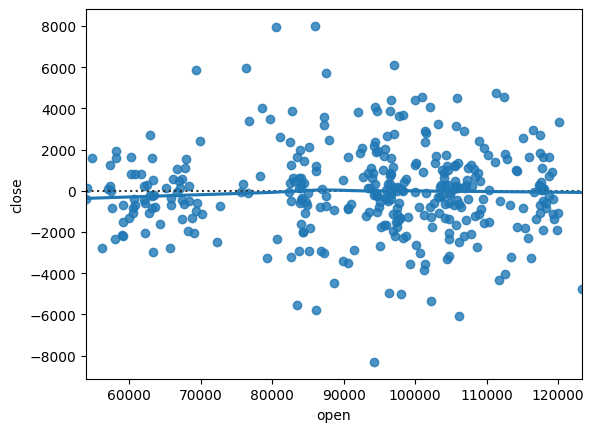

In [510]:
sns.residplot(x='open', y='close', data=df, lowess = True)
plt.xlabel("open")
plt.ylabel("close")
plt.show()

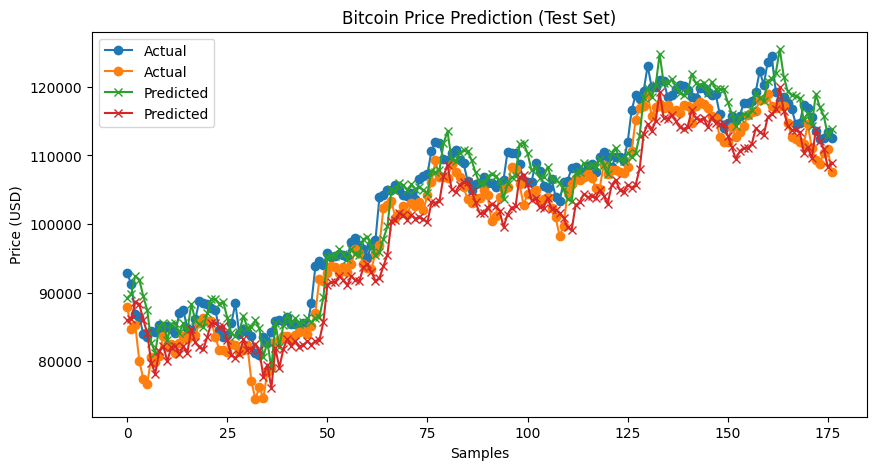

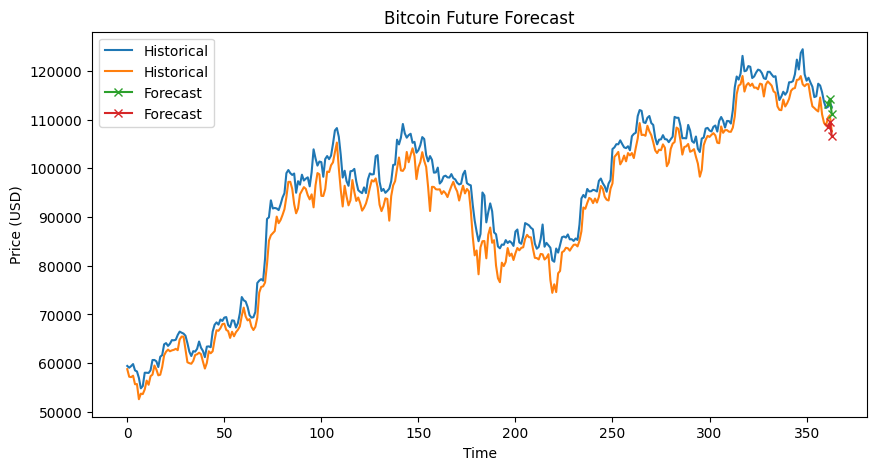

In [511]:
import matplotlib.pyplot as plt
y_pred = learner.predict(X_test)

plt.figure(figsize=(10,5))
plt.plot(Y_test, label="Actual", marker='o')
plt.plot(y_pred, label="Predicted", marker='x')
plt.legend()
plt.title("Bitcoin Price Prediction (Test Set)")
plt.xlabel("Samples")
plt.ylabel("Price (USD)")
plt.show()

forecast = learner.predict(X_lately)


future_index = df.index[-forecast_out:]

plt.figure(figsize=(10,5))
plt.plot(df[target_col].values, label="Historical")
plt.plot(future_index, forecast, label="Forecast", marker='x')
plt.legend()
plt.title("Bitcoin Future Forecast")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.show()


In [512]:
from sklearn.metrics import mean_squared_error
import numpy as np

results = []

for ts in np.arange(0.1, 0.99, 0.01):
    X_train, X_test, y_train, y_test, X_lately = prepare_data(
        df, forecast_col, target_col, forecast_out, ts
    )


    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append((ts, r2, rmse))

results_df = pd.DataFrame(results, columns=["test_size", "R2_score", "RMSE"])
print(tabulate(results_df, headers='keys', tablefmt='github'))

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too lar

|    |   test_size |   R2_score |      RMSE |
|----|-------------|------------|-----------|
|  0 |        0.1  |   0.144328 |   2689.35 |
|  1 |        0.11 |   0.183856 |   2598.7  |
|  2 |        0.12 |   0.182934 |   2565.37 |
|  3 |        0.13 |   0.228049 |   2514.33 |
|  4 |        0.14 |  -0.109332 |   2949.97 |
|  5 |        0.15 |   0.264056 |   2864.69 |
|  6 |        0.16 |   0.377977 |   2859.48 |
|  7 |        0.17 |   0.525496 |   2787.23 |
|  8 |        0.18 |   0.579975 |   2766.21 |
|  9 |        0.19 |   0.659505 |   2845.04 |
| 10 |        0.2  |   0.719521 |   2789.28 |
| 11 |        0.21 |   0.739297 |   2742.64 |
| 12 |        0.22 |   0.732973 |   2815.44 |
| 13 |        0.23 |   0.723602 |   2878.19 |
| 14 |        0.24 |   0.74384  |   2843.39 |
| 15 |        0.25 |   0.753786 |   2828.44 |
| 16 |        0.26 |   0.754137 |   2821.13 |
| 17 |        0.27 |   0.746844 |   2821.44 |
| 18 |        0.28 |   0.732379 |   2867.27 |
| 19 |        0.29 |   0.741887 | 

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too lar

/tmp/ipython-input-1466197727.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


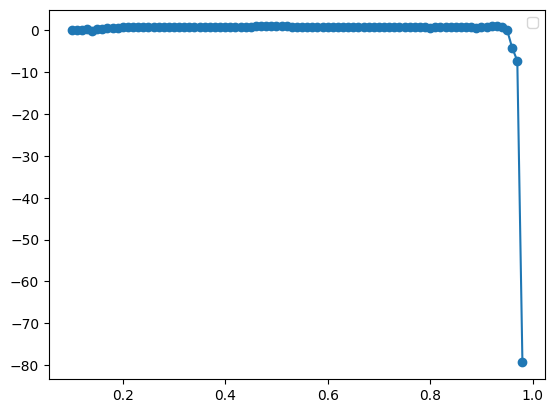

In [513]:
plt.plot(results_df["test_size"], results_df["R2_score"], marker='o')
plt.legend()
plt.show()

In [514]:
max_idx = results_df["R2_score"].idxmax()
results_df.loc[max_idx, "test_size"]

np.float64(0.48999999999999977)

In [515]:
 results_df.loc[max_idx, "R2_score"]

np.float64(0.941911176232413)

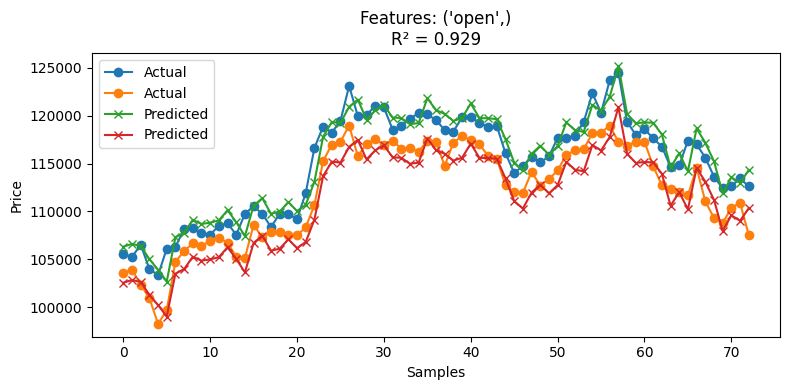

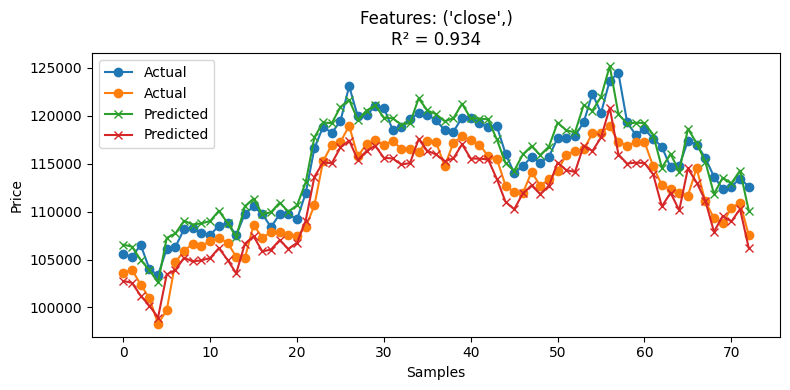

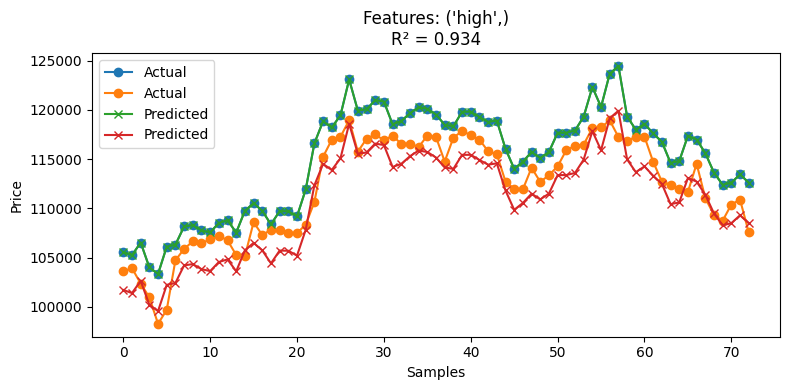

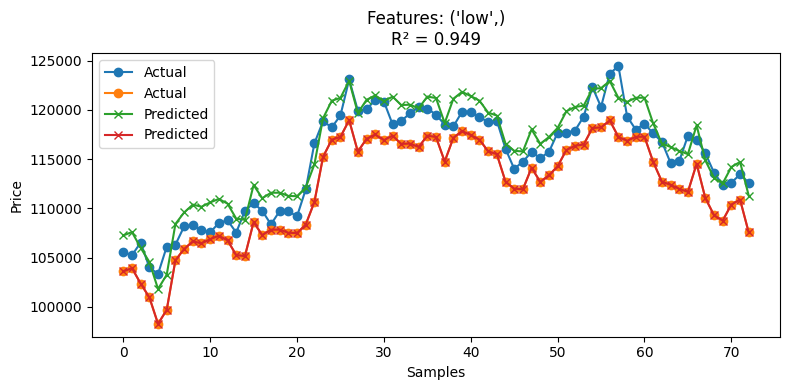

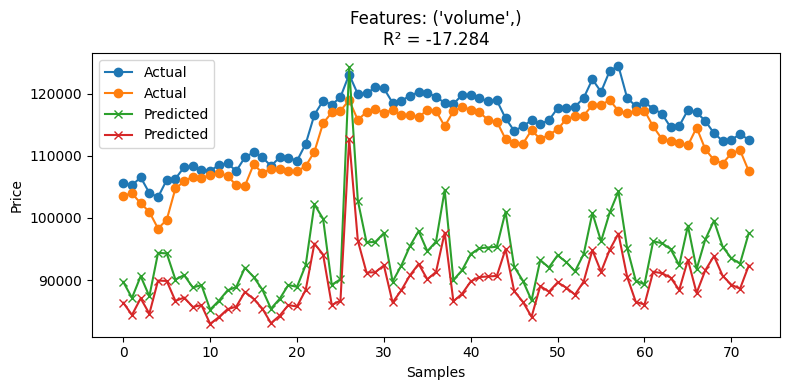

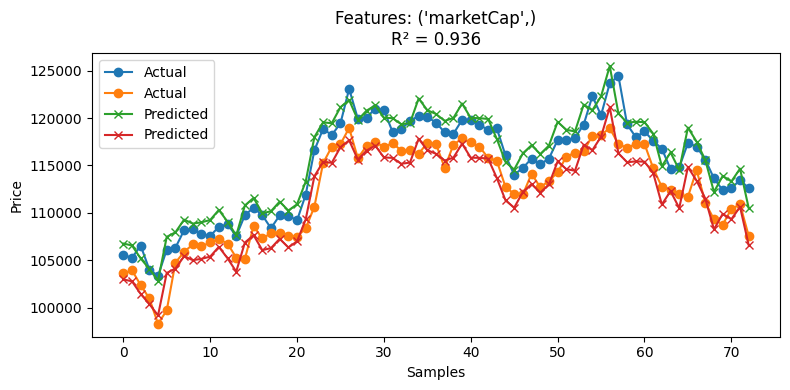

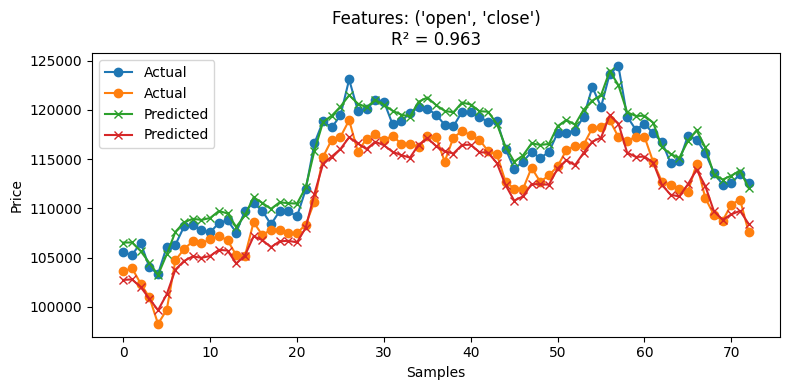

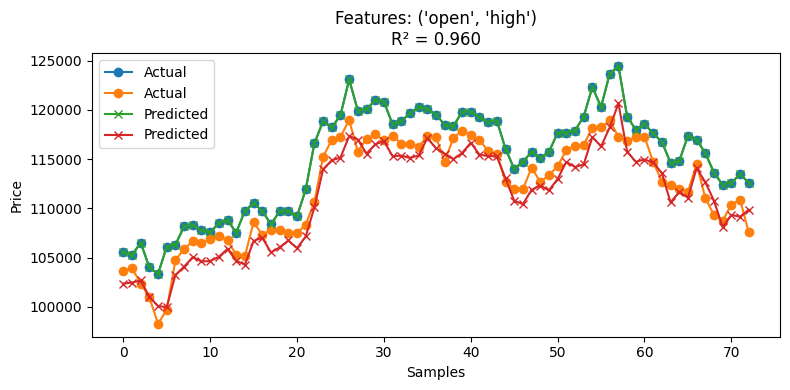

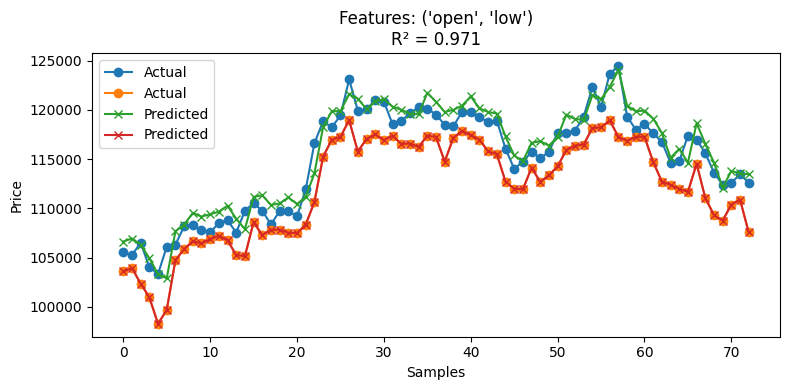

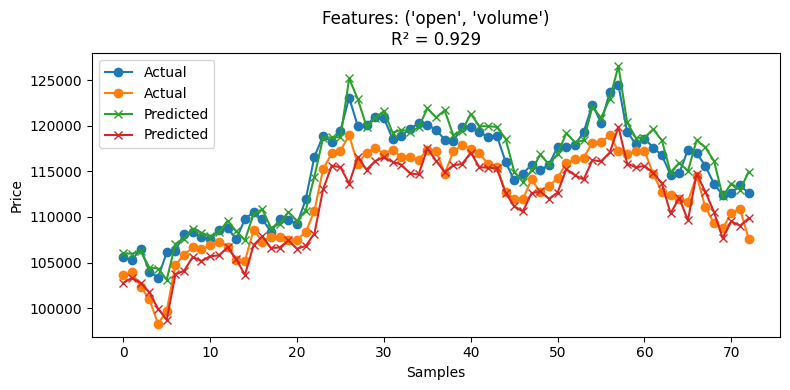

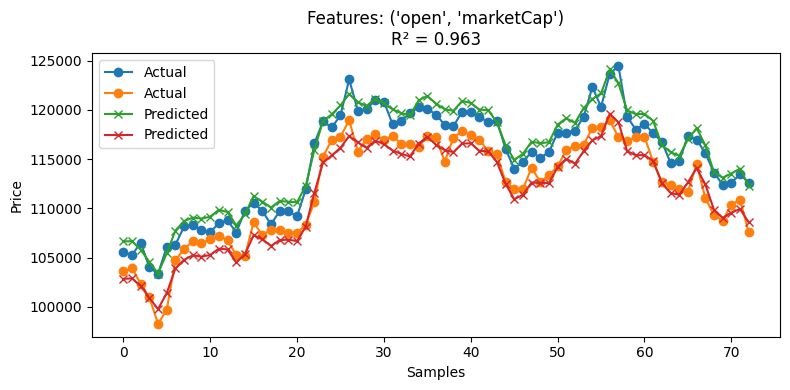

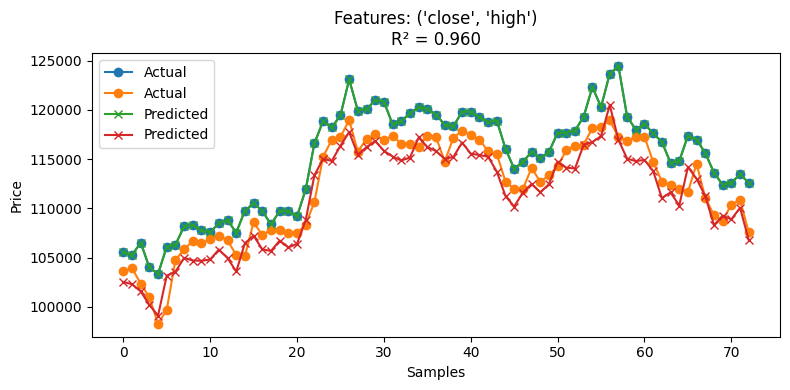

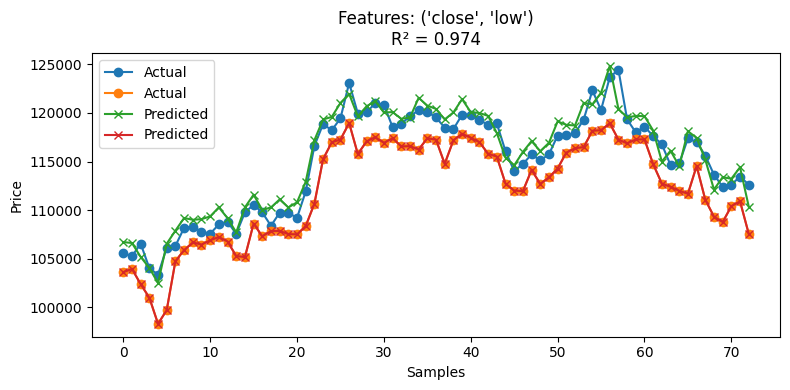

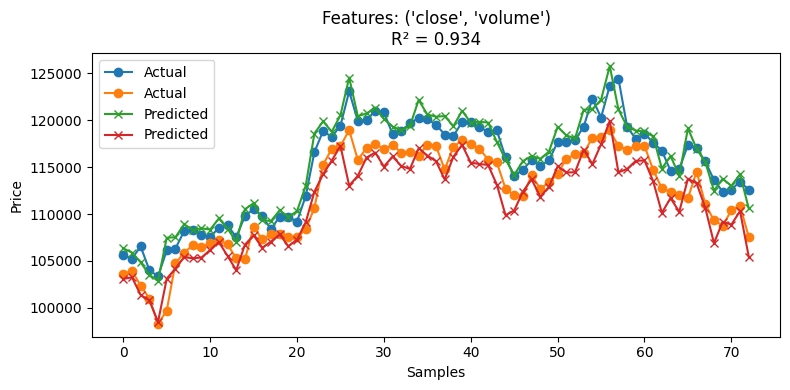

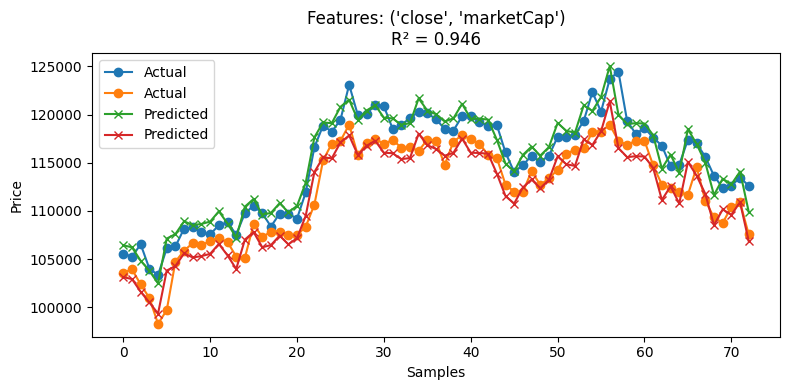

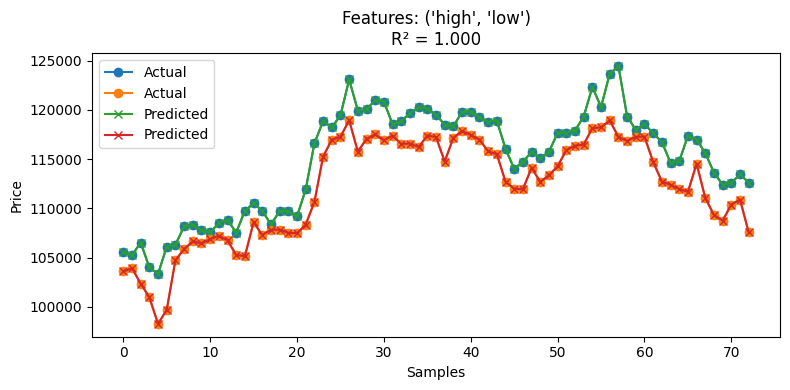

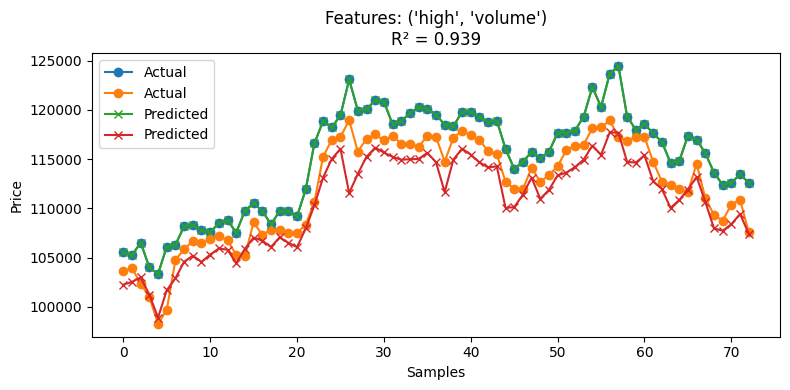

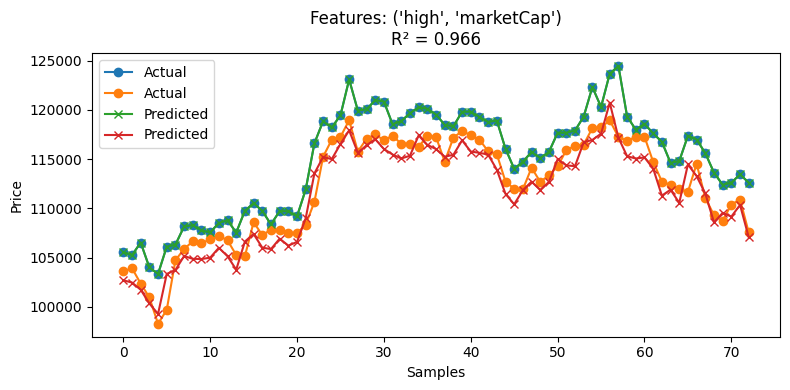

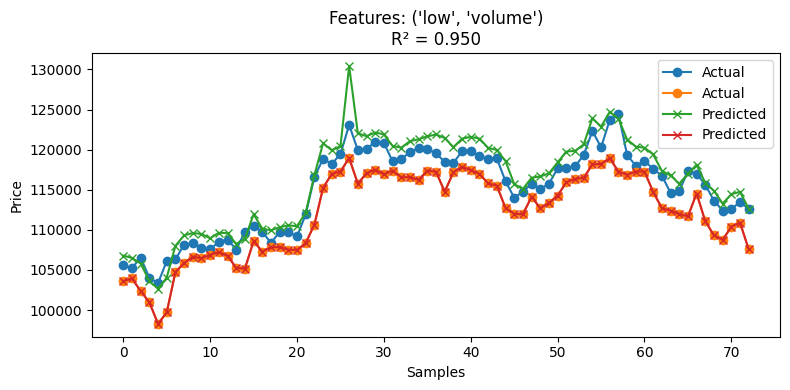

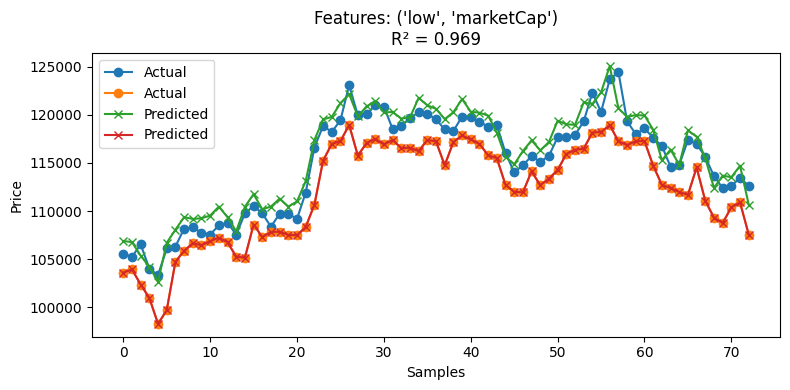

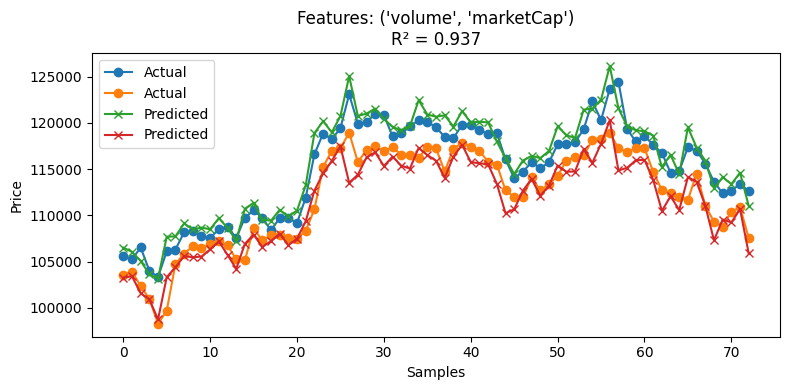

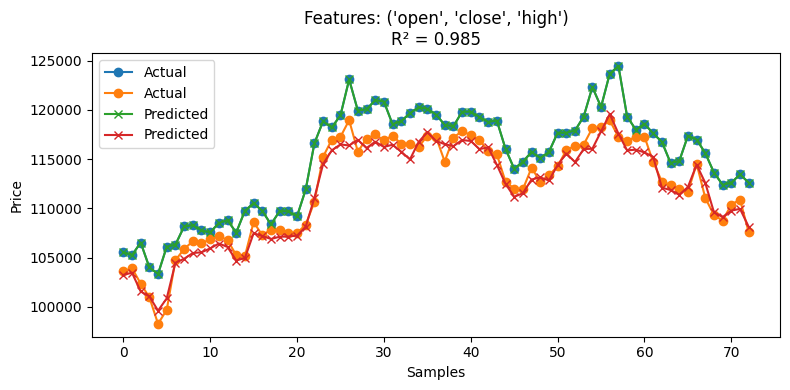

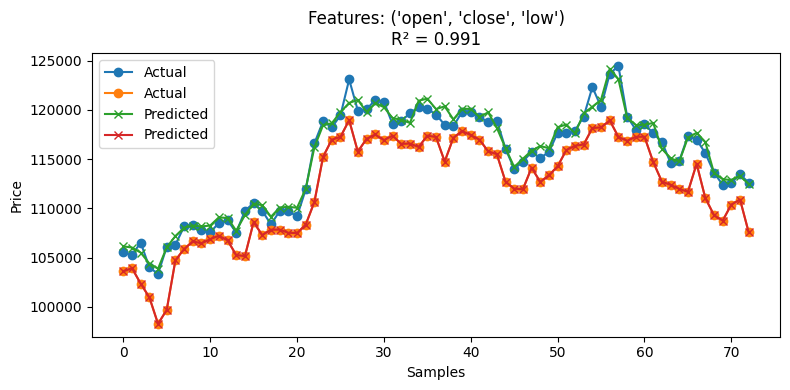

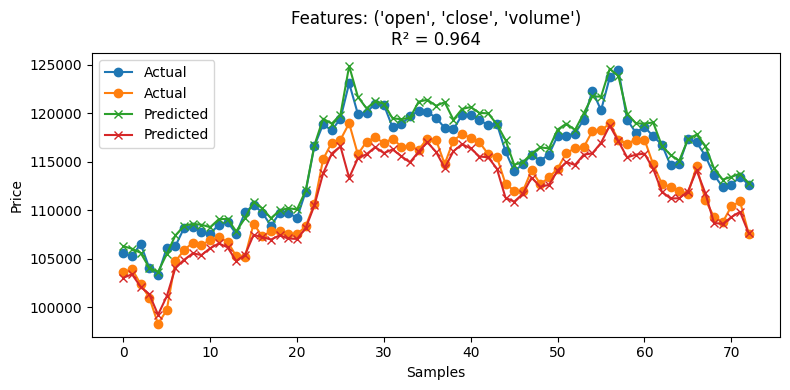

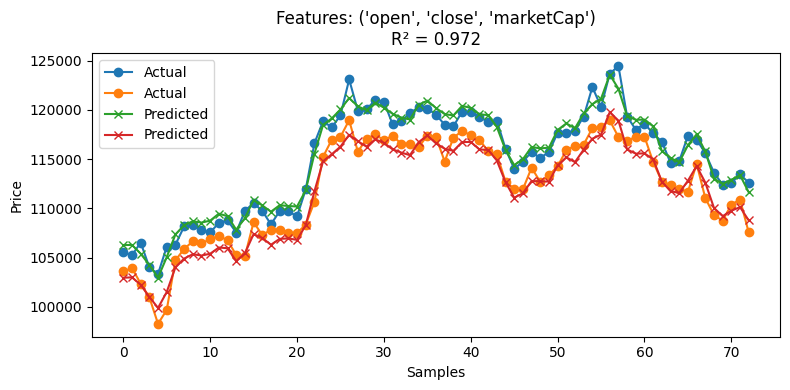

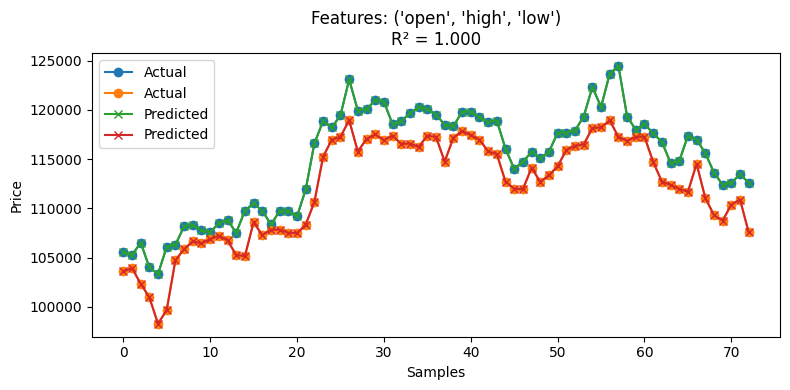

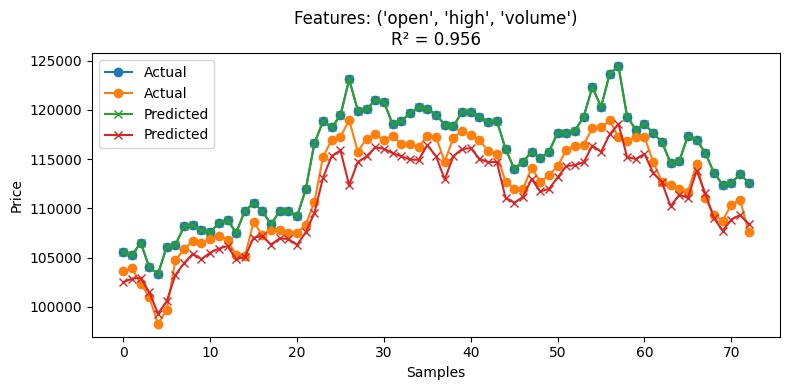

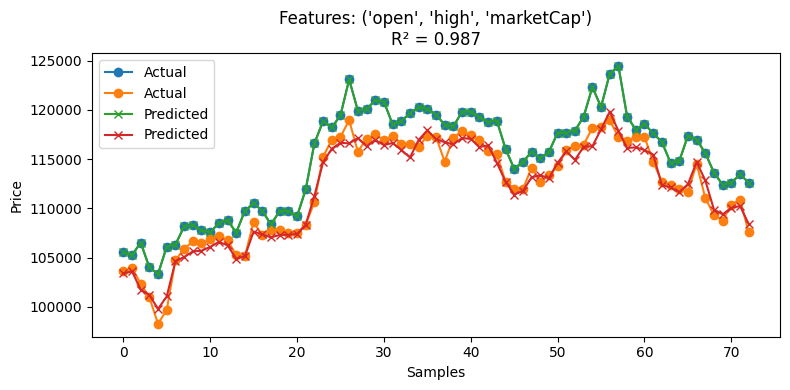

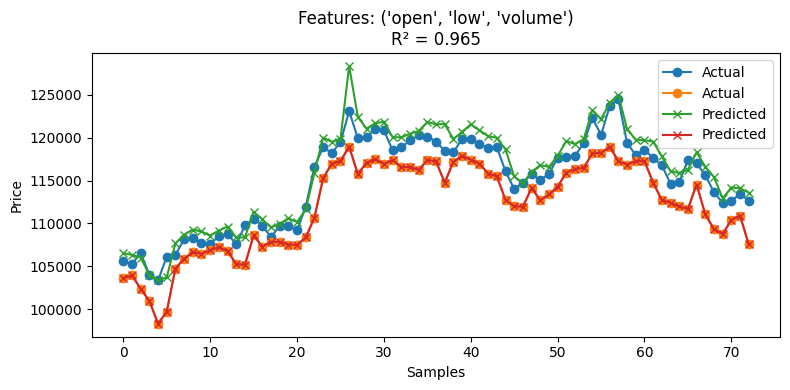

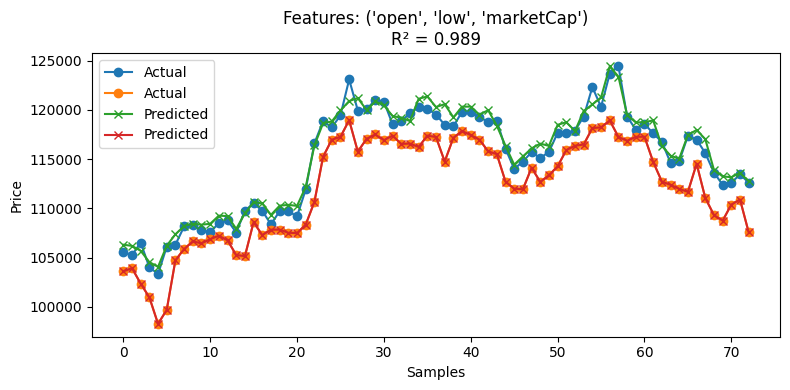

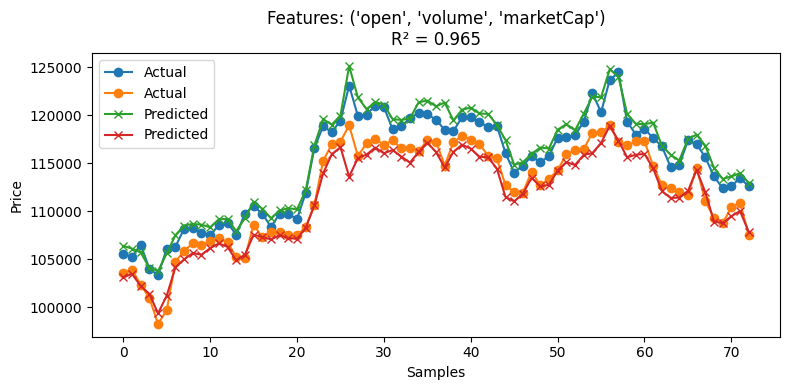

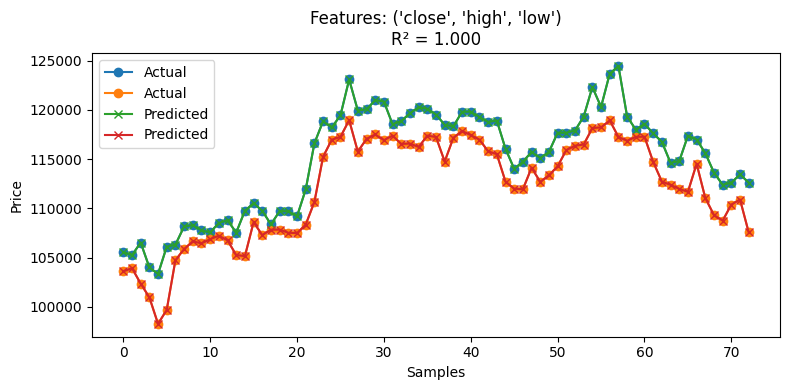

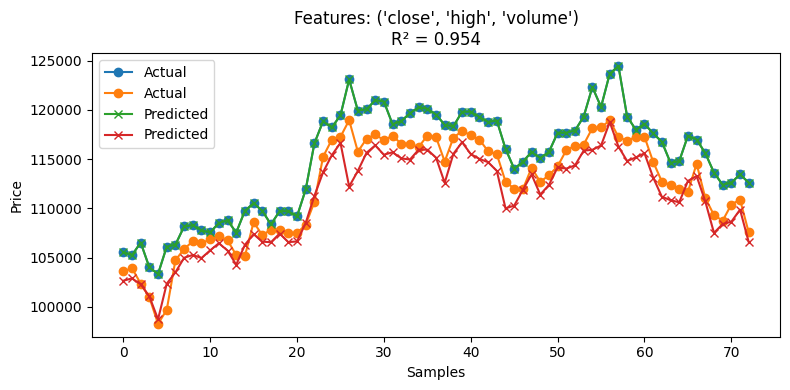

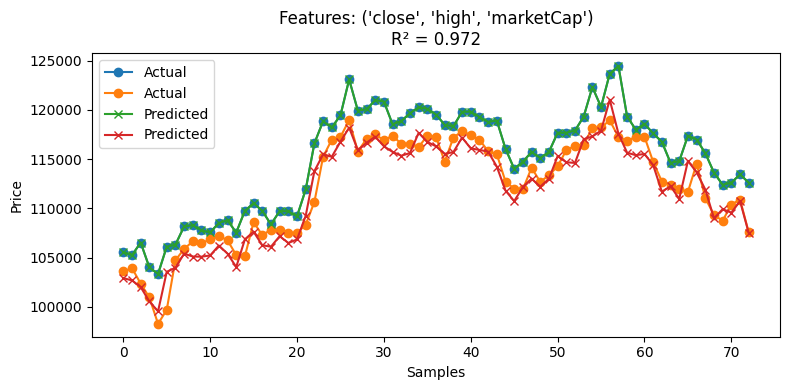

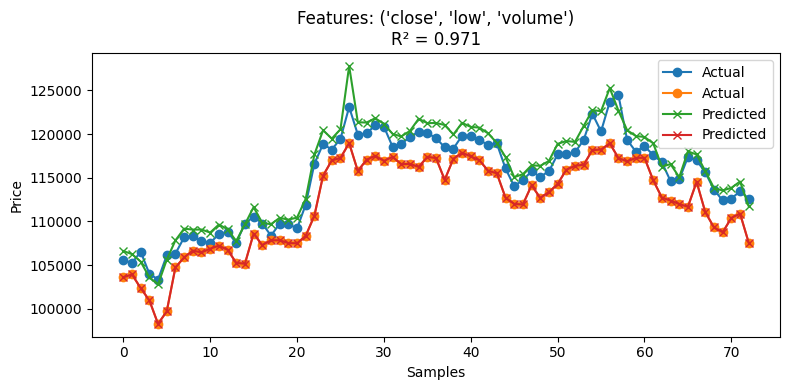

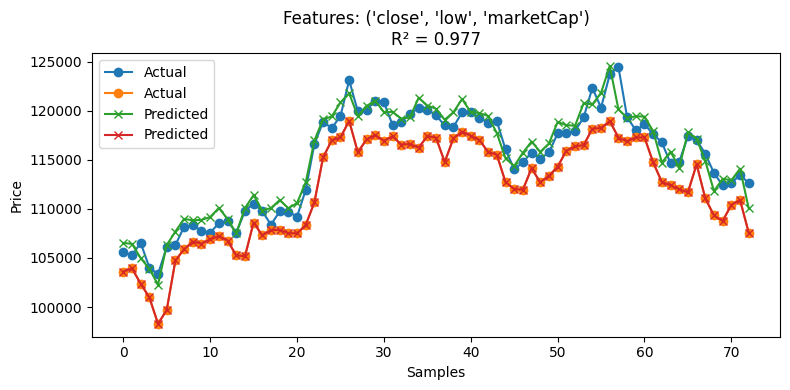

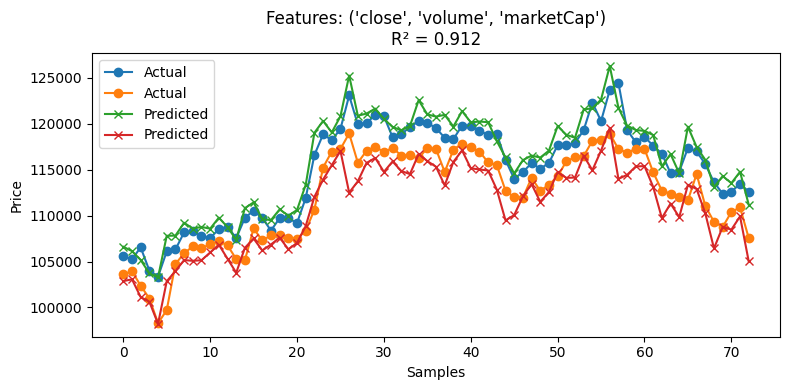

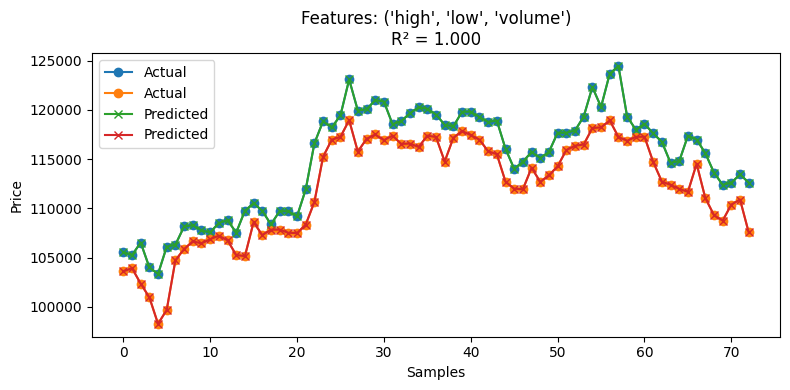

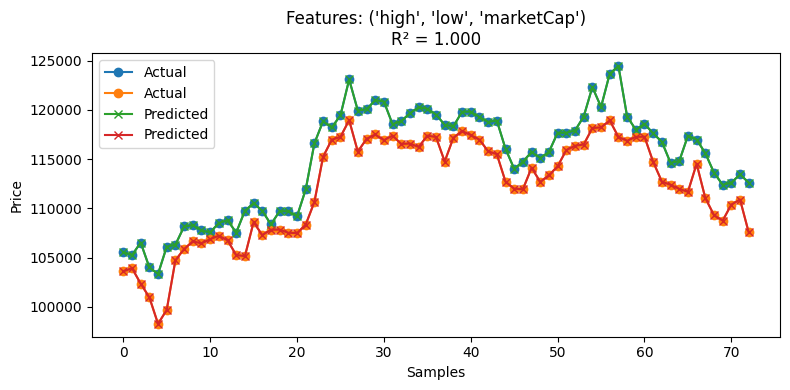

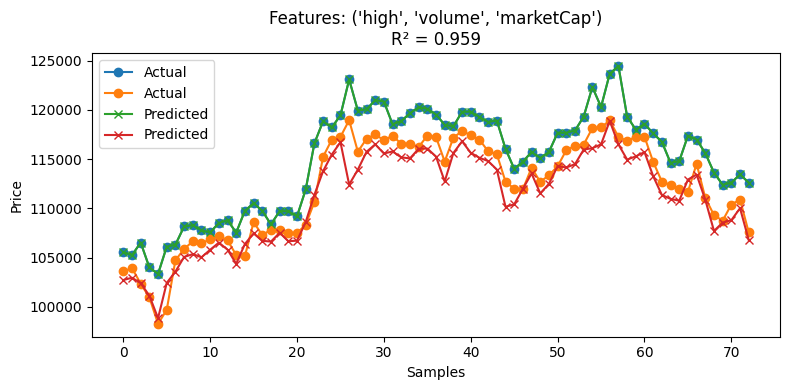

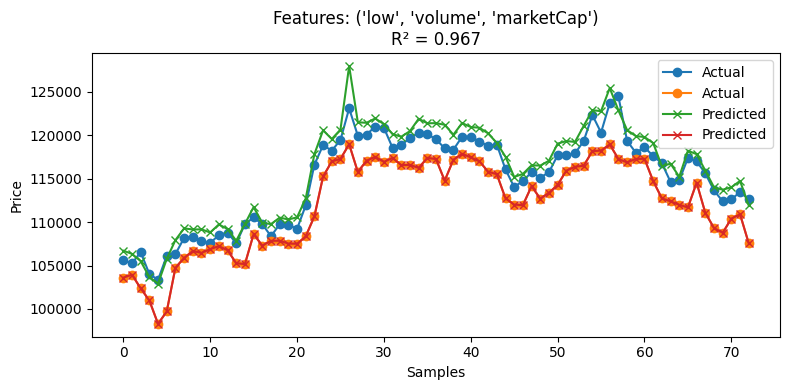

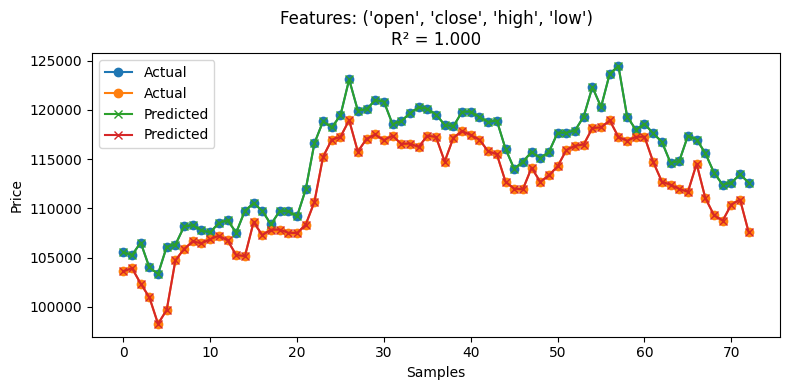

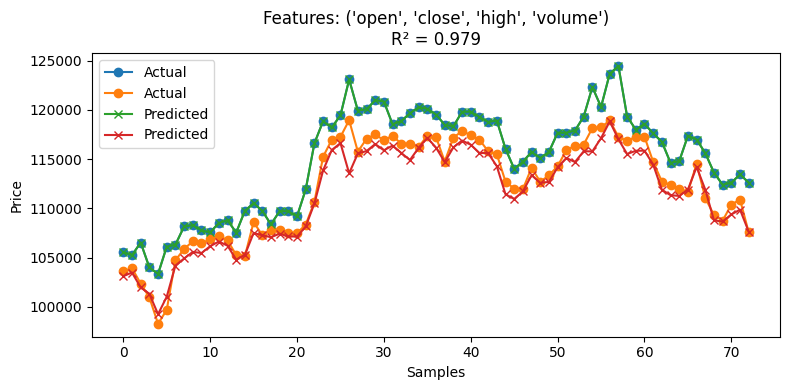

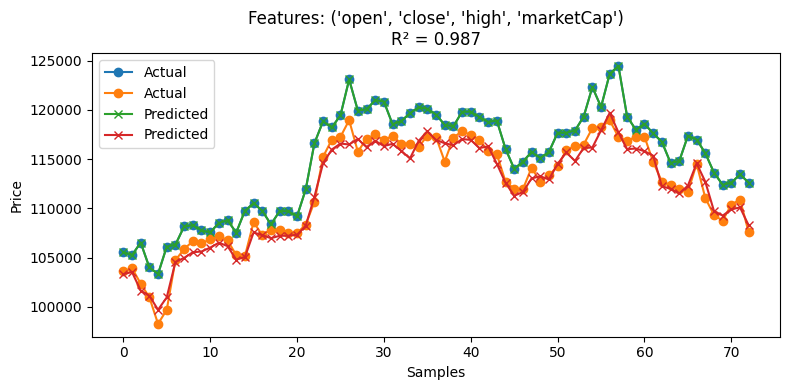

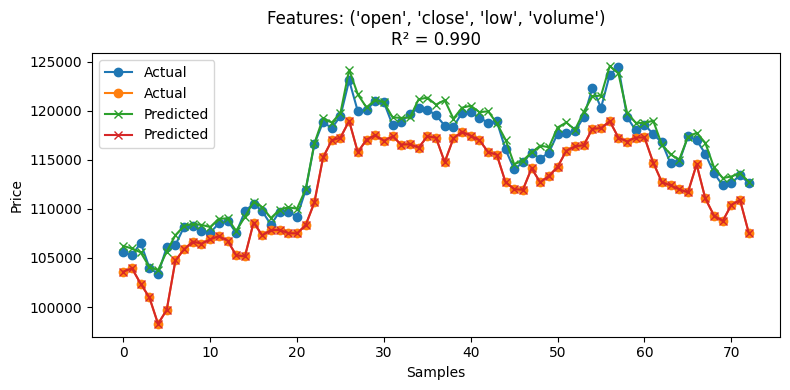

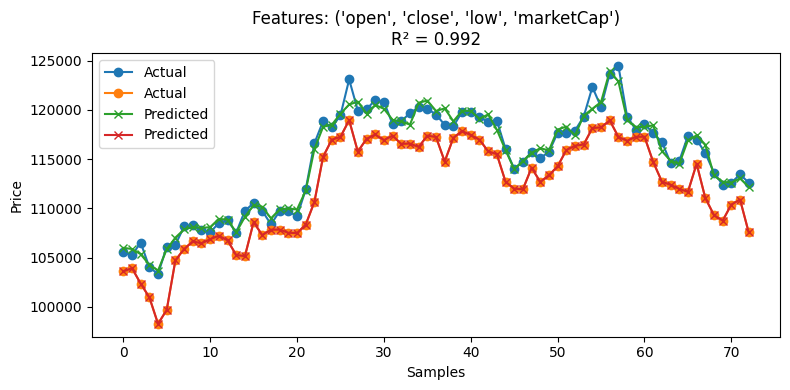

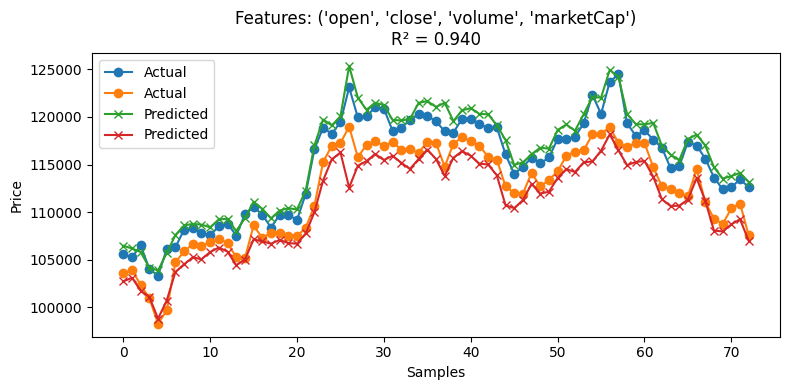

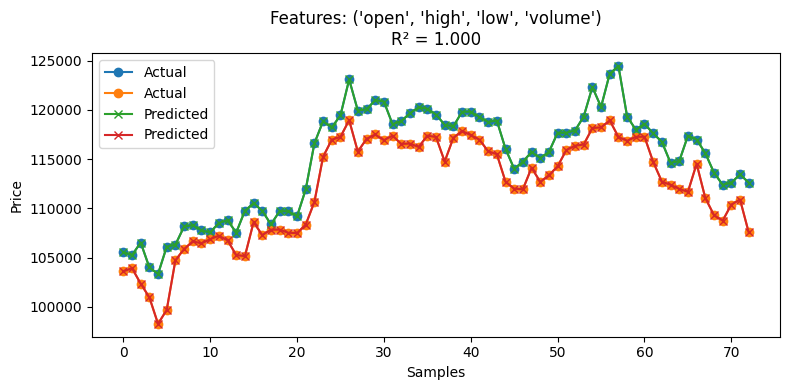

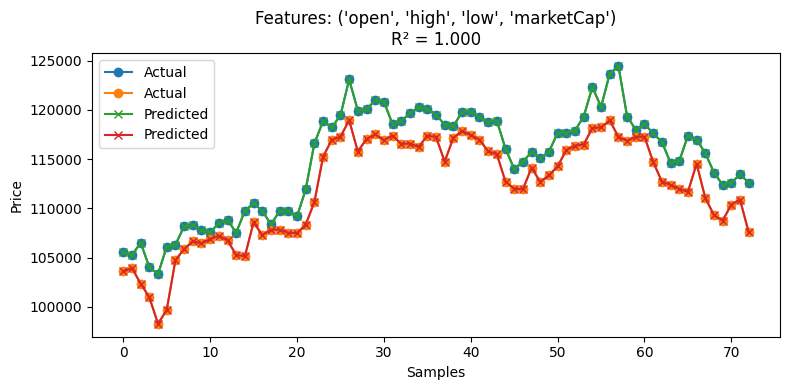

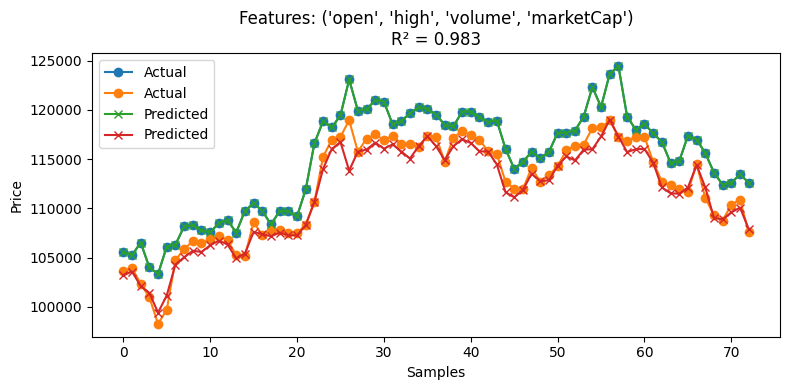

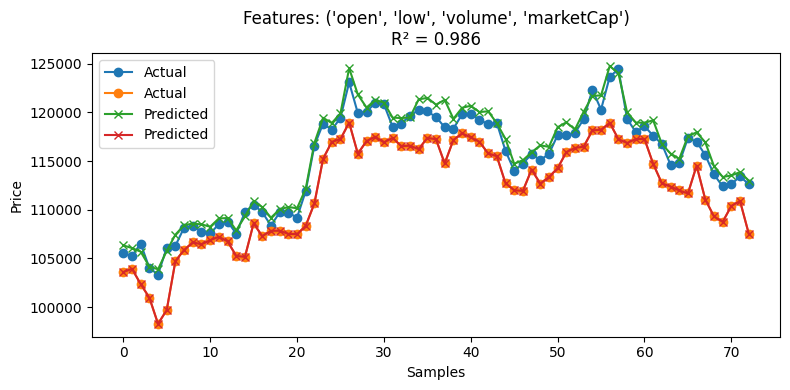

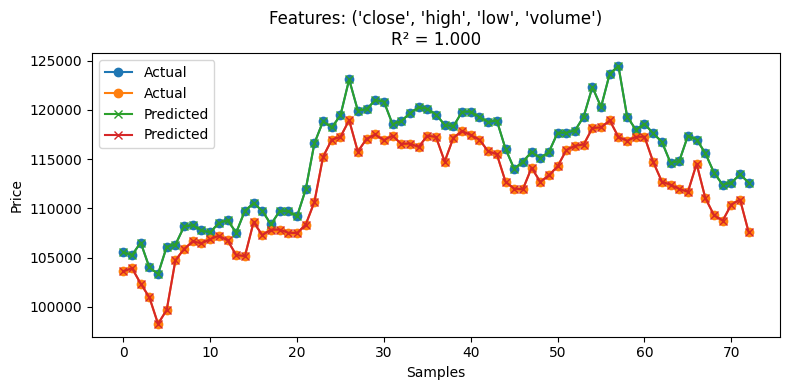

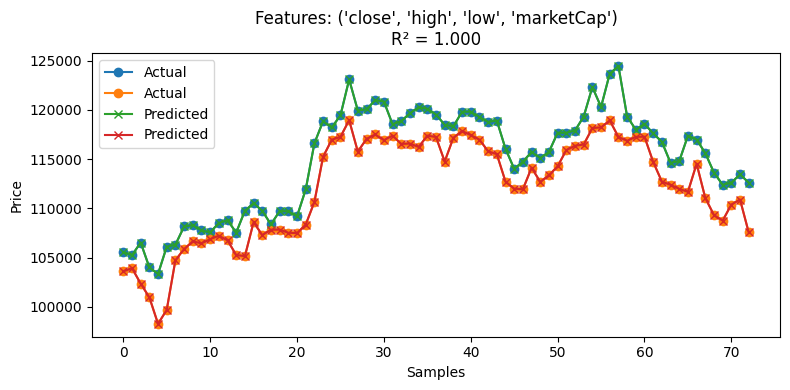

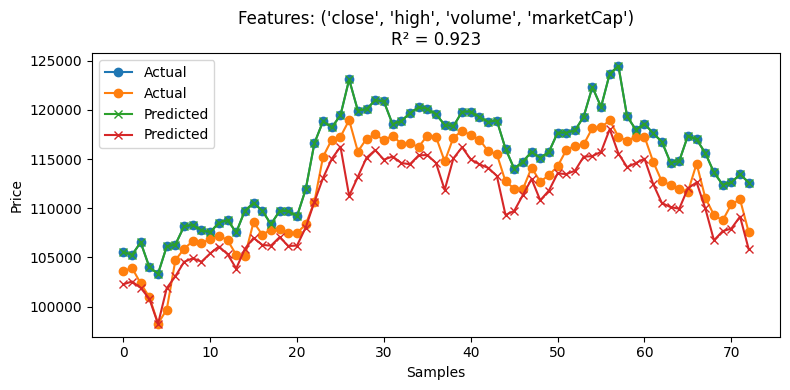

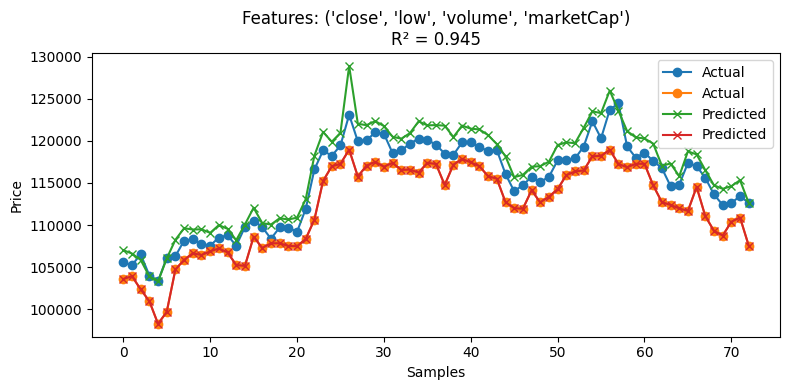

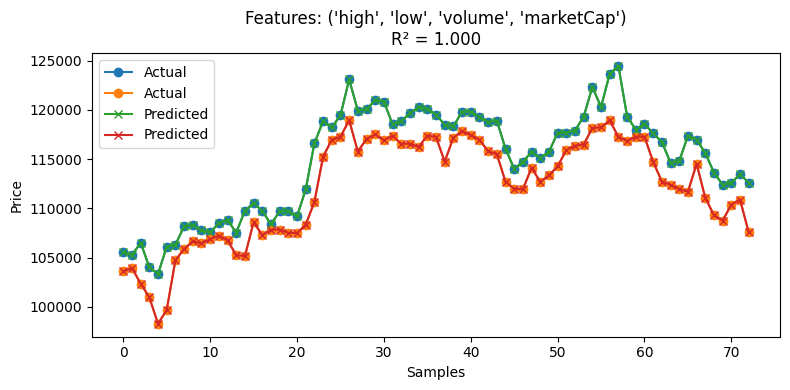

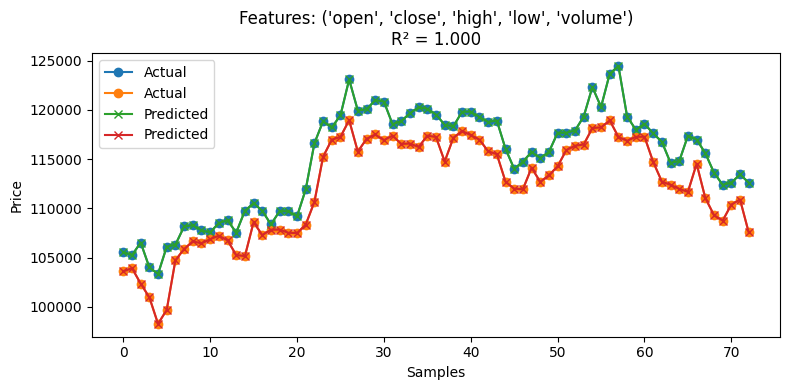

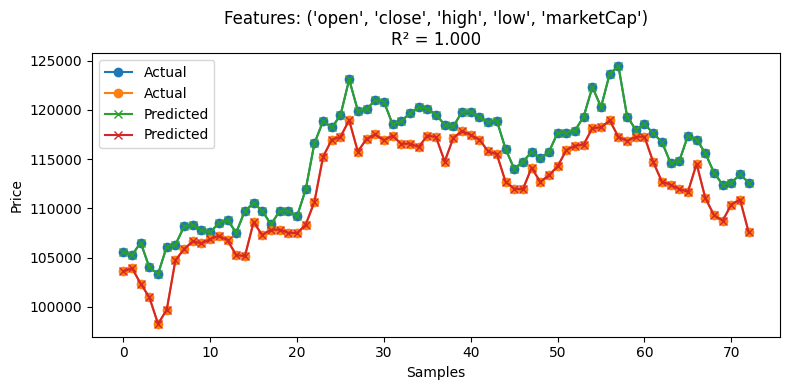

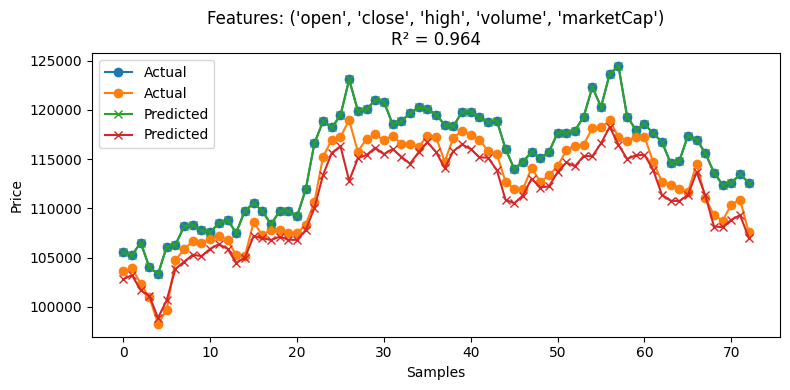

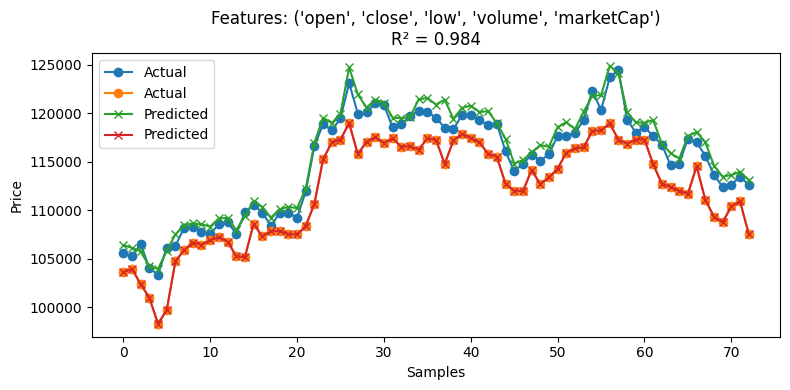

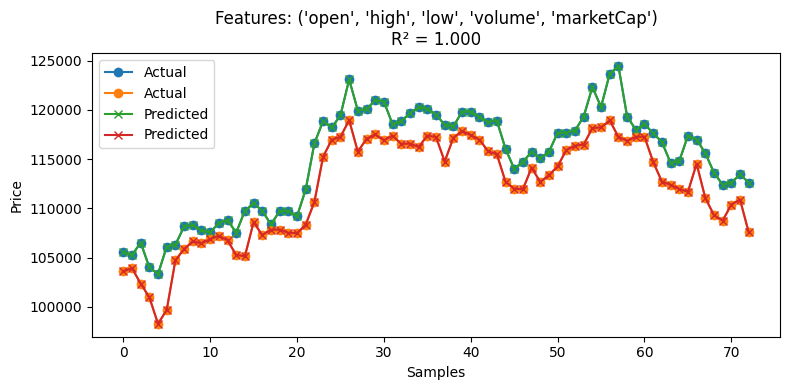

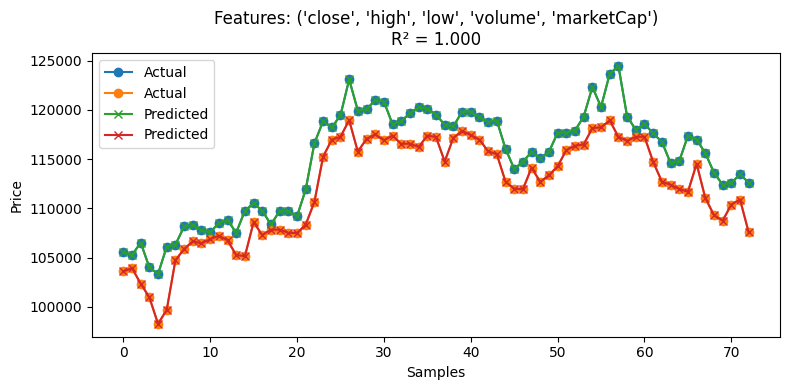

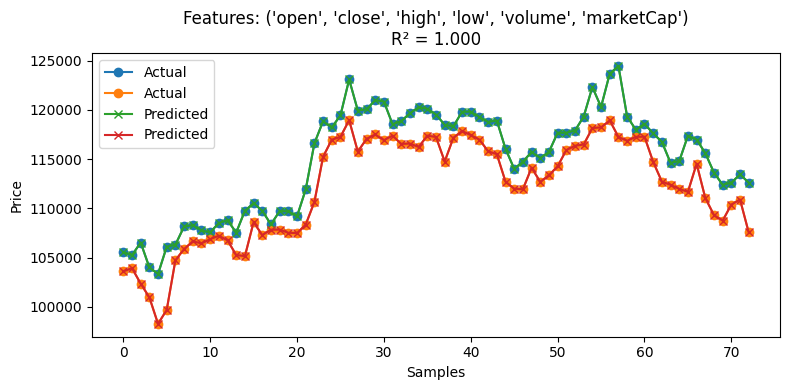

In [516]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

features_col = ['open', 'close', 'high', 'low', 'volume', 'marketCap']
target_col = ['high', 'low']

for r in range(1, len(features_col)+1):
    for combo in itertools.combinations(features_col, r):
        X = df[list(combo)]
        y = df[target_col]

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, shuffle=False
        )

        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        r2 = r2_score(y_test, y_pred)

        plt.figure(figsize=(8,4))
        plt.plot(y_test.values, label="Actual", marker='o')
        plt.plot(y_pred, label="Predicted", marker='x')
        plt.title(f"Features: {combo}\nR² = {r2:.3f}")
        plt.xlabel("Samples")
        plt.ylabel("Price")
        plt.legend()
        plt.tight_layout()
        plt.show()


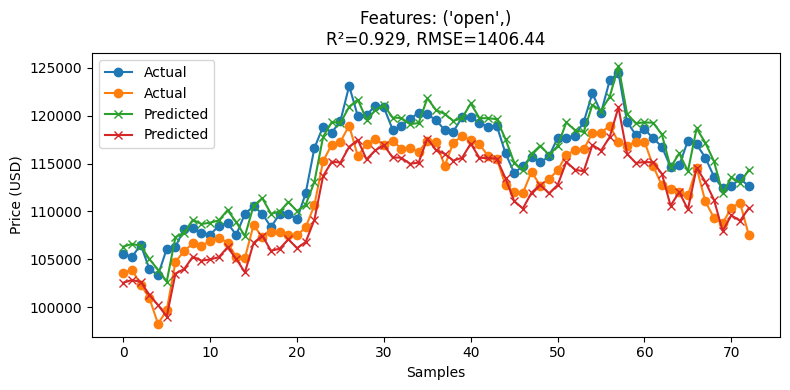

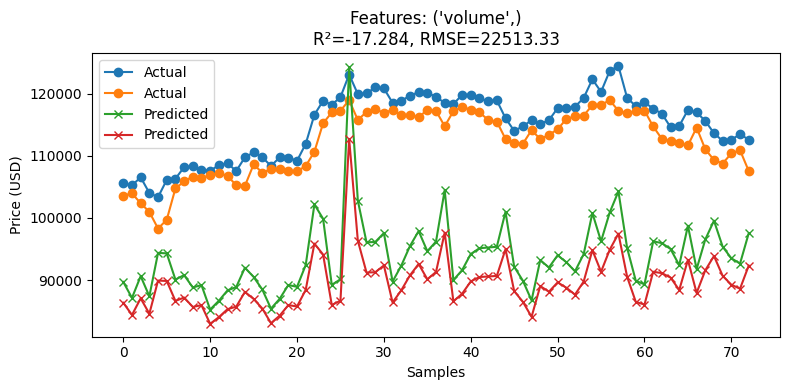

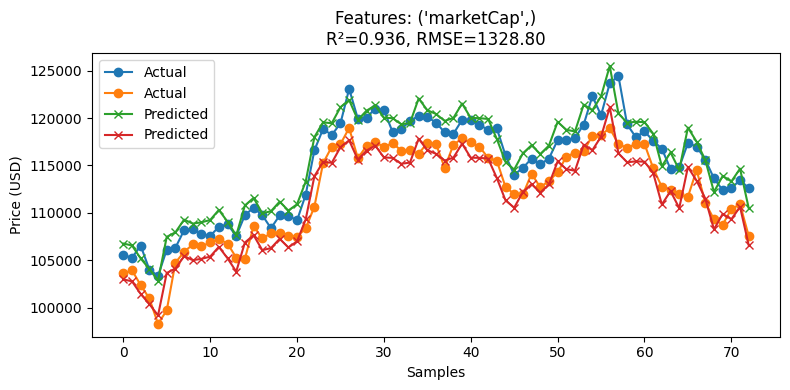

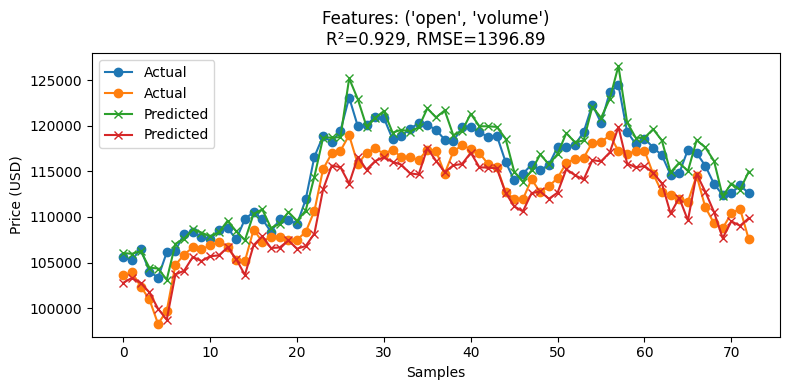

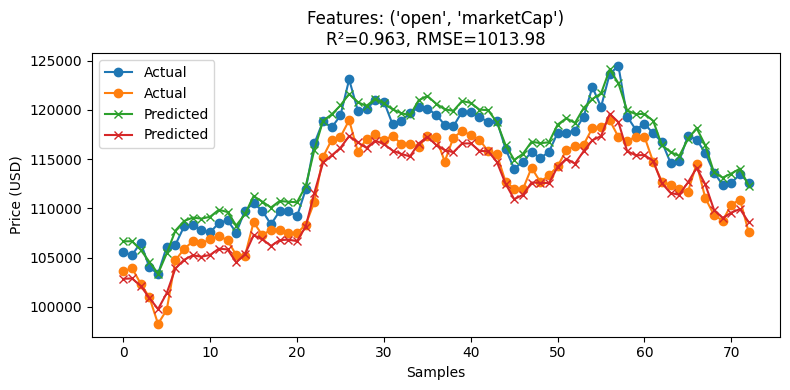

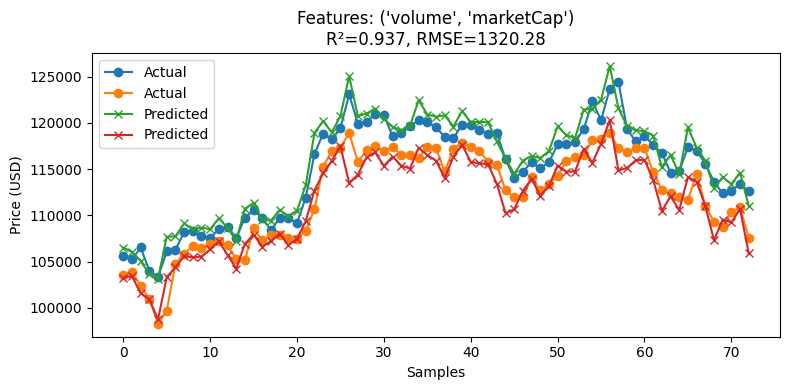

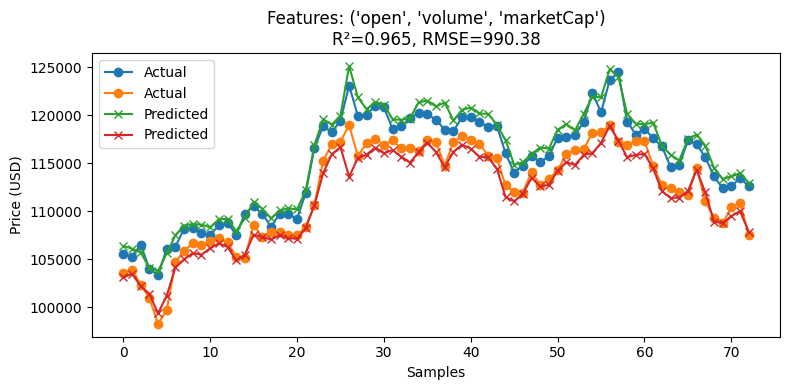

    features                           r2_score       rmse
--  -------------------------------  ----------  ---------
 6  ('open', 'volume', 'marketCap')    0.964596    990.375
 4  ('open', 'marketCap')              0.962931   1013.98
 5  ('volume', 'marketCap')            0.937044   1320.28
 2  ('marketCap',)                     0.936356   1328.8
 3  ('open', 'volume')                 0.929469   1396.89
 0  ('open',)                          0.928521   1406.44
 1  ('volume',)                      -17.2844    22513.3


In [517]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

features_col = ['open', 'volume', 'marketCap']
target_col = ['high', 'low']

results = []

for r in range(1, len(features_col)+1):
    for combo in itertools.combinations(features_col, r):
        X = df[list(combo)]
        y = df[target_col]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        results.append({'features': combo, 'r2_score': r2, 'rmse': rmse})

        plt.figure(figsize=(8,4))
        plt.plot(y_test.values, label="Actual", marker='o')
        plt.plot(y_pred, label="Predicted", marker='x')
        plt.title(f"Features: {combo}\nR²={r2:.3f}, RMSE={rmse:.2f}")
        plt.xlabel("Samples")
        plt.ylabel("Price (USD)")
        plt.legend()
        plt.tight_layout()
        plt.show()

results_df = pd.DataFrame(results).sort_values(by='r2_score', ascending=False)
print(tabulate(results_df, headers='keys'))
